0
0.40000000000000013
0.40000000000000013
0.40000000000000113
0.4000000000000219
0.40000000000005653
0.40000000000018243
0.4000000000005093
0.40000000000085933
0.4000000000015589
0.40000000000251135
0.40000000000363245
0.40000000000490077
0.4000000000068007
0.40000000000899183
0.4000000000115266
0.4000000000138503
0.4000000000164846
0.40000000001944436
0.4000000000235716
0.40000000002750546
0.4000000000314805
0.40000000003640857
0.4000000000409244
0.40000000004680714
0.40000000005254077
0.4000000000601751
0.40000000006629777
0.4000000000738949
0.4000000000816534
0.40000000009061065
0.4000000001006174
0.40000000011370973
0.40000000012404724
0.40000000013719583
0.4000000001491145
0.400000000161329
0.4000000001752221
0.4000000001909009
0.4000000002048041
0.4000000002213341
0.40000000023671745
0.40000000025533755
0.4000000002756279
0.4000000002950812
0.4000000003150048
0.4000000003376063
0.4000000003623527
0.40000000038275596
0.400000000408021
0.40000000043648853
0.4000000004623814
0.40000

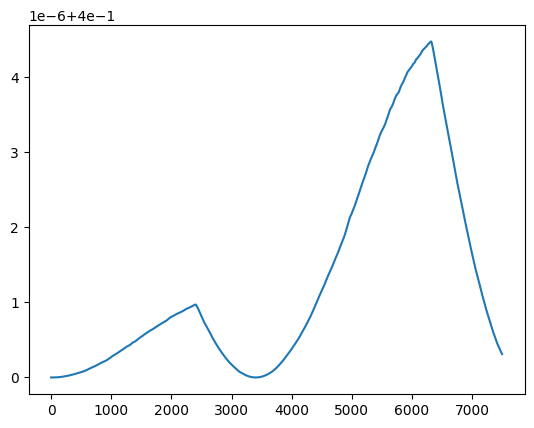

In [ ]:
import mujoco as mj
import mujoco.viewer
import time
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
# Load the XML model

model = mj.MjModel.from_xml_path(r"penulumQuestion4.xml")

data = mj.MjData(model)

joint1_name = "joint1"
joint2_name = "joint2"

joint1_id = model.joint(joint1_name).id
joint2_id = model.joint(joint2_name).id



world_frame_id = 0


frame1_name = "frame1"
frame1_id = model.body(name=frame1_name).id


frame2_name = "frame2"
frame2_id = model.body(name=frame2_name).id

end_effector_body_name="end-effector"
end_effector_body_id = model.body(name=end_effector_body_name).id
actuator_id = model.actuator(name="joint1-actuator").id
print(actuator_id)


def get_spatial_transformation(body_id):
    #Extract the positions
    rot = data.xmat[body_id].reshape(3,3)
    pos = data.xpos[body_id]


    #Convert to transformation matrix
    transformation = np.eye(4) 
    transformation[:3, :3] = rot  
    transformation[:3, 3] = pos 
    return transformation


heights = []
# theta1_parta = 5 * np.pi / 6
# theta2_parta = -3 * np.pi / 7
theta1_parta = 5 * np.pi / 6
theta2_parta = 0

#set model to the given theta values
data.qpos[joint1_id] = theta1_parta
data.qpos[joint2_id] = theta2_parta
# data.qvel[joint1_id] = 0.05
# data.qvel[joint2_id] = 0
def sgn(x):
    return np.piecewise(x, [x < 0, x >= 0], [-1, 1])
mj.mj_forward(model, data)
timeSimulated = 0
with mujoco.viewer.launch_passive(model, data) as viewer:
    while viewer.is_running():
        # Compute control input
        print(data.xpos[end_effector_body_id][2])
        data.ctrl[actuator_id] = -1500 * np.sign(data.qvel[1].copy())  # Apply the function
        # mj.mj_forward(model, data)
        # Step simulation
        mujoco.mj_step(model, data)
        # print(data.xpos[end_effector_body_id])
        heights.append(data.xpos[end_effector_body_id][2])
        viewer.sync()  
        time.sleep(0.002)
        timeSimulated += .002
        if timeSimulated > 15:
            break




plt.figure()
plt.plot(heights)
plt.show()